In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv('Salary_Data.csv')

In [121]:
df.head(5)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [122]:
df.tail(5)

,YearsExperience,Age,Salary
25,9.0,34.0,105582
26,9.5,35.0,116969
27,9.6,36.0,112635
28,10.3,37.0,122391
29,10.5,38.0,121872


In [123]:
df.sample(5)

,YearsExperience,Age,Salary
11,4.0,24.0,55794
21,7.1,30.0,98273
7,3.2,23.3,54445
14,4.5,25.0,61111
15,4.9,25.0,67938


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [125]:
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [126]:
df.shape

(30, 3)

In [127]:
df.dtypes

YearsExperience    float64
Age                float64
Salary               int64
dtype: object

In [128]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

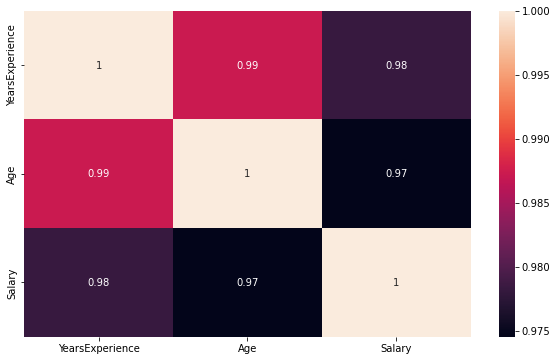

In [129]:
cor = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)
plt.show()

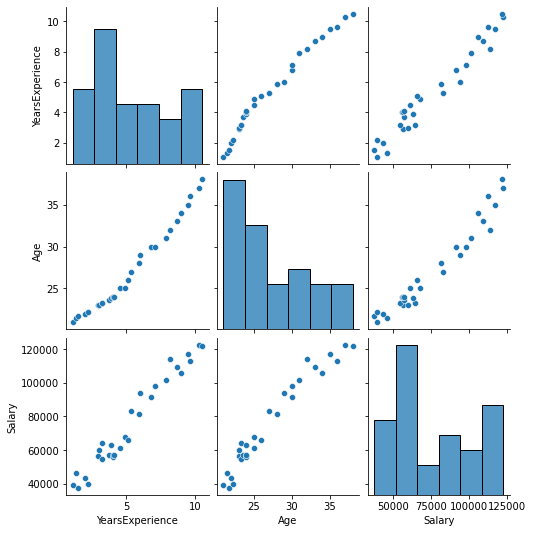

In [130]:
sns.pairplot(df)
plt.show()

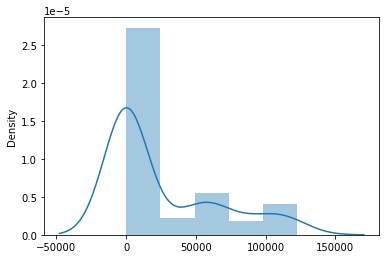

In [131]:
sns.distplot(df)
plt.show()

In [132]:
import statsmodels.api as sm
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.35e-19
Time:                        22:28:58   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
x1          6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
x2          1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

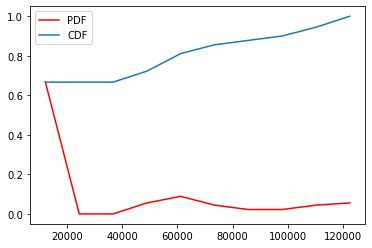

In [134]:
count, bins_count = np.histogram(df, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [136]:
X

array([[-1.51005294, -1.22507556],
       [-1.43837321, -1.12654401],
       [-1.36669348, -1.08713139],
       [-1.18749416, -1.02801246],
       [-1.11581443, -0.98859985],
       [-0.86493538, -0.83094937],
       [-0.82909552, -0.83094937],
       [-0.75741579, -0.77183044],
       [-0.75741579, -0.77183044],
       [-0.57821647, -0.71271152],
       [-0.50653674, -0.65359259],
       [-0.47069688, -0.63388628],
       [-0.47069688, -0.63388628],
       [-0.43485702, -0.63388628],
       [-0.29149756, -0.43682319],
       [-0.1481381 , -0.43682319],
       [-0.07645838, -0.2397601 ],
       [-0.00477865, -0.042697  ],
       [ 0.21026054,  0.15436609],
       [ 0.2461004 ,  0.35142918],
       [ 0.53281931,  0.54849227],
       [ 0.6403389 ,  0.54849227],
       [ 0.92705781,  0.74555537],
       [ 1.03457741,  0.94261846],
       [ 1.21377673,  1.13968155],
       [ 1.32129632,  1.33674464],
       [ 1.50049564,  1.53380773],
       [ 1.5363355 ,  1.73087083],
       [ 1.78721455,

In [137]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, random_state = 42)

In [138]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = linear.predict(X_test)

In [140]:
y_pred

array([118686.60525402,  67497.80208802, 101581.52273219,  74585.69879684,
        54833.367916  ,  58044.6977654 ])

In [141]:
Theta_0 = linear.coef_[0]
Theta_1 = linear.coef_[1]
print(Theta_0)
print(Theta_1)

13622.117847857004
13028.916910562937


In [142]:
linear.intercept_

75207.08981841589

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train = linear.score(X_train, y_train)
test = linear.score(X_test, y_test)

In [144]:
print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print('R2_score: ', r2)
print('Train Score: ', train)
print('Test Score: ', test)

MSE:  58634181.71398237
MAE:  6281.985247730361
RMSE:  7657.295979259413
R2_score:  0.8852101657216537
Train Score:  0.9700017923404648
Test Score:  0.8852101657216537


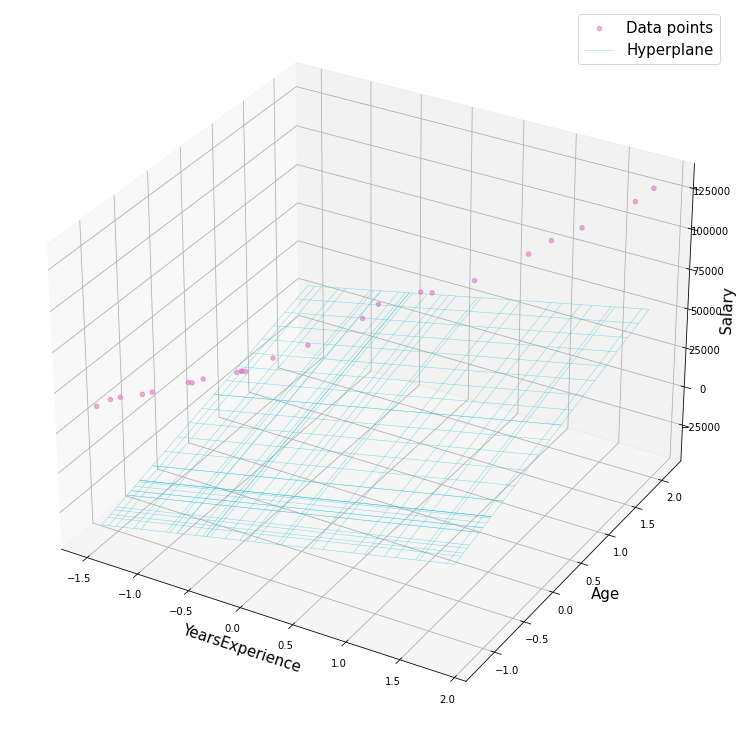

In [145]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], linear.predict(X_train), c='C6', marker='o', alpha=0.6) 
x0, x1 = np.meshgrid(X[:,0], X[:,1])
yp = Theta_0 * x0 + Theta_1 * x1
ax.plot_wireframe(x0, x1, yp, linewidth = 0.5,color='C9', alpha=0.5)
ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
ax.set_xlabel('YearsExperience', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.set_zlabel('Salary', fontsize = 15)
plt.show()

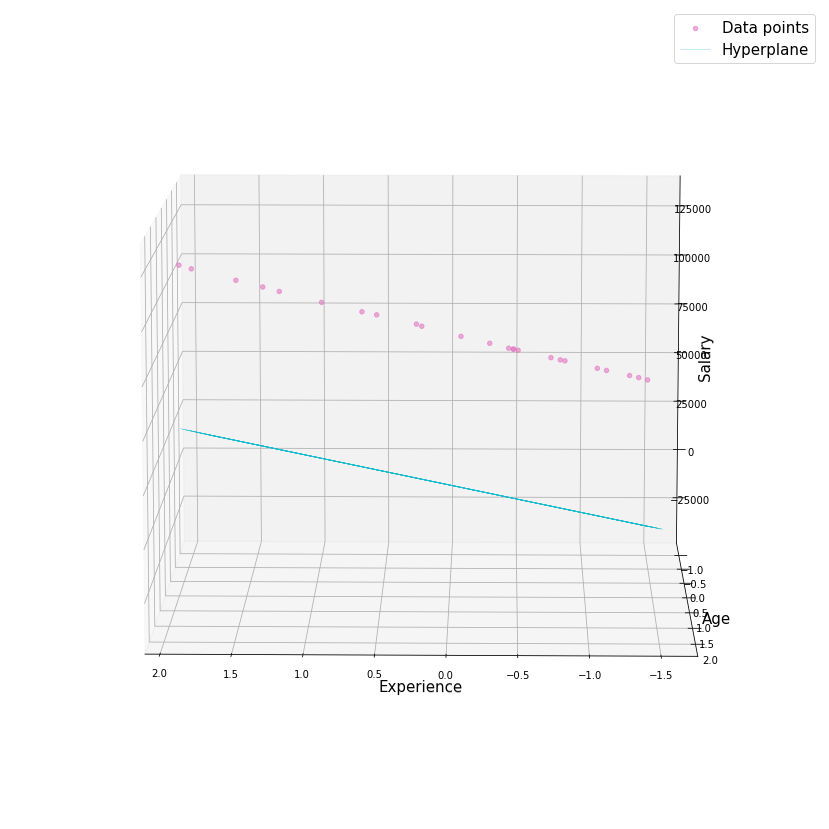

In [146]:
def plot_view(elev_given, azim_given):
    fig = plt.figure(figsize = (30, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], linear.predict(X_train), c='C6', marker='o', alpha=0.6, label='Data points')
    x0, x1 = np.meshgrid(X[:,0], X[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0 ,x1 ,yp , rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')
    ax.set_xlabel('Experience', fontsize = 15)
    ax.set_ylabel('Age', fontsize = 15)
    ax.set_zlabel('Salary', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)
plot_view(10,91)
plt.show()

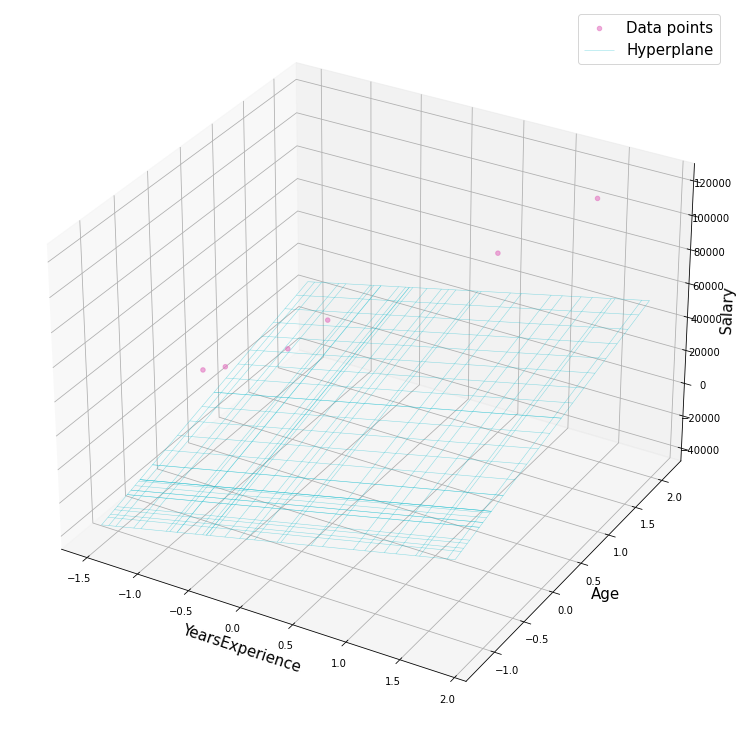

In [147]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(X_test[:,0], X_test[:,1], linear.predict(X_test), c='C6', marker='o', alpha=0.6) 
x0, x1 = np.meshgrid(X[:,0], X[:,1])
yp = Theta_0 * x0 + Theta_1 * x1
ax.plot_wireframe(x0, x1, yp, linewidth = 0.5,color='C9', alpha=0.5)
ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
ax.set_xlabel('YearsExperience', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.set_zlabel('Salary', fontsize = 15)
plt.show()

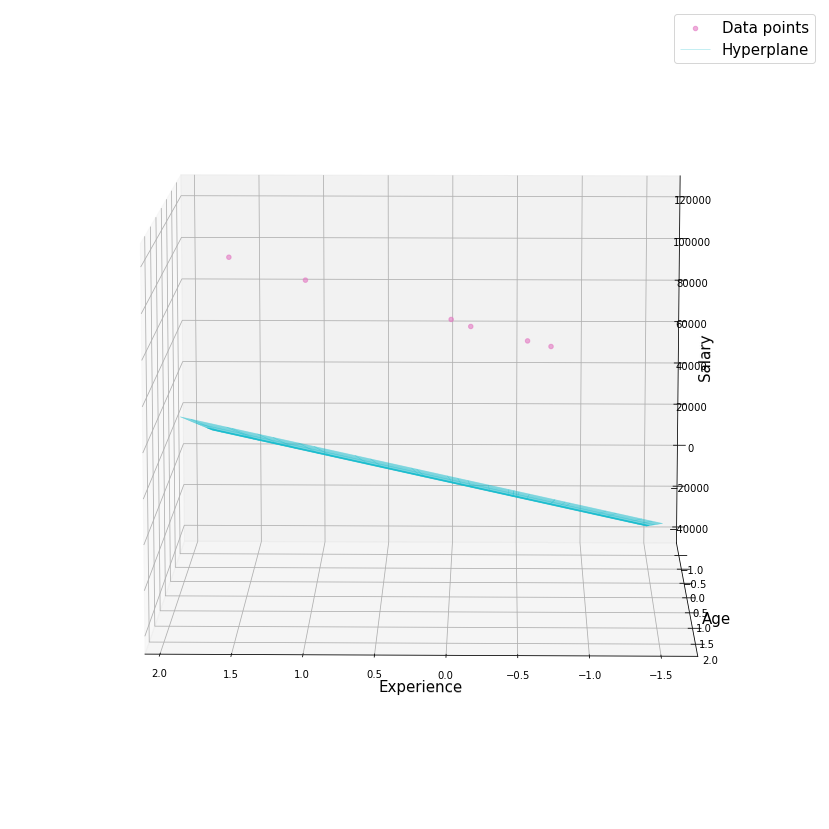

In [148]:
def plot_view(elev_given, azim_given):
    fig = plt.figure(figsize = (30, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], linear.predict(X_test), c='C6', marker='o', alpha=0.6, label='Data points')
    x0, x1 = np.meshgrid(X[:,0], X[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0 ,x1 ,yp , rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')
    ax.set_xlabel('Experience', fontsize = 15)
    ax.set_ylabel('Age', fontsize = 15)
    ax.set_zlabel('Salary', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)
plot_view(10,91)
plt.show()

In [149]:
slope1 = []
slope2 = []
cost_function = []
epochs = 1000000
learning_rate=0.0001
m1 = 0
m2 = 0
c = 0
X1 = X[:, 0]
X2 = X[:, 1]
n = float(len(y))
for i in range(epochs):
    y_current = (m1 * X1) + (m2 * X2) + c
    cost = sum([data**2 for data in (y-y_current)]) / n
    m_gradient1 = -(2/n) * sum(X1 * (y - y_current))
    m_gradient2 = -(2/n) * sum(X2 * (y - y_current))
    b_gradient = -(2/n) * sum(y - y_current)
    m1 = m1 - (learning_rate * m_gradient1)
    m2 = m2 - (learning_rate * m_gradient2)
    c = c - (learning_rate * b_gradient)
    slope1.append(m1)
    slope2.append(m2)
    cost_function.append(cost)

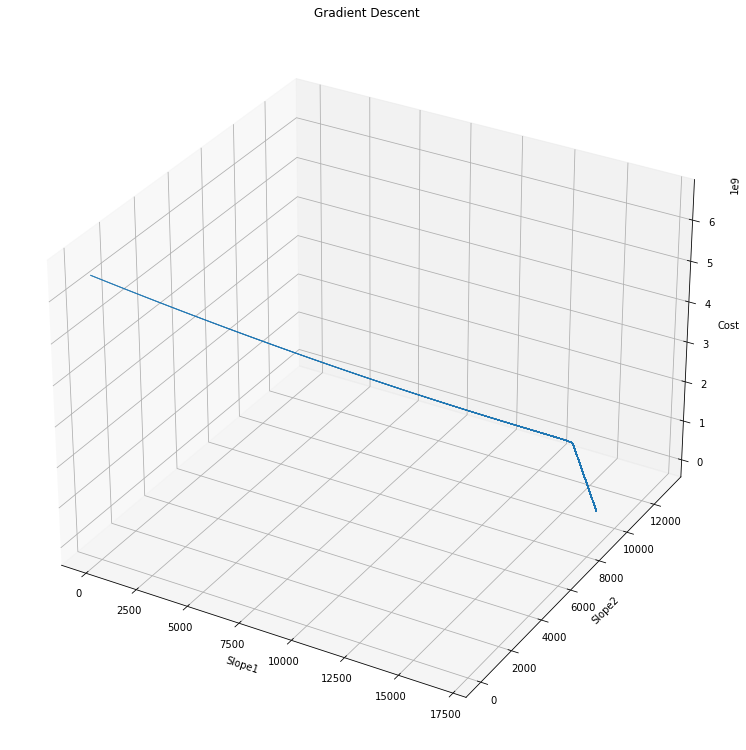

In [153]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(slope1, slope2, cost_function, s = 1, linewidths = 0, alpha=0.6) 
ax.set_xlabel('Slope1')
ax.set_ylabel('Slope2')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent')
plt.show()

In [154]:
import pickle
save = pickle.dumps(linear)
saved_model = pickle.loads(save)
saved_model.predict(X_test)

array([118686.60525402,  67497.80208802, 101581.52273219,  74585.69879684,
        54833.367916  ,  58044.6977654 ])

In [155]:
saved_model.predict([[1.1, 21.0]])

array([363798.67457288])

In [156]:
saved_model=pickle.dump(linear,open('Linear_Regression.pkl', 'wb')) 